In [46]:
import os
import xarray as xr
import matplotlib.pyplot as plt
from aqua.graphics.timeseries import _extend_cycle

In [14]:
# Open the file
outputdir='output/netcdf'

# Open 2t files

icon_histo_ts_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_ICON_historical-1990_ann.nc')
icon_histo_ts_ann=xr.open_mfdataset(icon_histo_ts_ann)

icon_ssp_ts_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_ICON_ssp370_ann.nc')
icon_ssp_ts_ann=xr.open_mfdataset(icon_ssp_ts_ann)

ifsnemo_histo_ts_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_IFS-NEMO_historical-1990_ann.nc')
ifsnemo_histo_ts_ann=xr.open_mfdataset(ifsnemo_histo_ts_ann)

ifsnemo_ssp_ts_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_IFS-NEMO_ssp370_ann.nc')
ifsnemo_ssp_ts_ann=xr.open_mfdataset(ifsnemo_ssp_ts_ann)

era5_ts_ann=os.path.join(outputdir,
                         'global_time_series_timeseries_2t_ERA5_era5_ann.nc')
era5_ts_ann=xr.open_mfdataset(era5_ts_ann)

era5_ts_std_ann=os.path.join(outputdir,
                          'global_time_series_timeseries_2t_ERA5_era5_std_ann.nc')
era5_ts_std_ann=xr.open_mfdataset(era5_ts_std_ann)

In [56]:
# mtpr

icon_histo_ts_mon=os.path.join(outputdir,
                                    'global_time_series_timeseries_mtpr_ICON_historical-1990_mon.nc')
icon_histo_ts_mon=xr.open_mfdataset(icon_histo_ts_mon)

icon_ssp_ts_mon=os.path.join(outputdir,
                                    'global_time_series_timeseries_mtpr_ICON_ssp370_mon.nc')
icon_ssp_ts_mon=xr.open_mfdataset(icon_ssp_ts_mon)

ifsnemo_histo_ts_mon=os.path.join(outputdir,
                                    'global_time_series_timeseries_mtpr_IFS-NEMO_historical-1990_mon.nc')
ifsnemo_histo_ts_mon=xr.open_mfdataset(ifsnemo_histo_ts_mon)

ifsnemo_ssp_ts_mon=os.path.join(outputdir,
                                    'global_time_series_timeseries_mtpr_IFS-NEMO_ssp370_mon.nc')
ifsnemo_ssp_ts_mon=xr.open_mfdataset(ifsnemo_ssp_ts_mon)

era5_ss_mon=os.path.join(outputdir,
                        'global_time_series_timeseries_mtpr_ERA5_era5_mon.nc')
era5_ss_mon=xr.open_mfdataset(era5_ss_mon)

era5_ss_std_mon=os.path.join(outputdir,
                            'global_time_series_timeseries_mtpr_ERA5_era5_std_mon.nc')
era5_ss_std_mon=xr.open_mfdataset(era5_ss_std_mon)

In [57]:
# Build seasonal cycle
icon_histo_ss=icon_histo_ts_mon.groupby('time.month').mean('time')
icon_ssp_ss=icon_ssp_ts_mon.groupby('time.month').mean('time')
ifsnemo_histo_ss=ifsnemo_histo_ts_mon.groupby('time.month').mean('time')
ifsnemo_ssp_ss=ifsnemo_ssp_ts_mon.groupby('time.month').mean('time')
era5_ss=era5_ss_mon.groupby('time.month').mean('time')

# Extend cycle
icon_histo_ss=_extend_cycle(icon_histo_ss)
icon_ssp_ss=_extend_cycle(icon_ssp_ss)
ifsnemo_histo_ss=_extend_cycle(ifsnemo_histo_ss)
ifsnemo_ssp_ss=_extend_cycle(ifsnemo_ssp_ss)
era5_ss=_extend_cycle(era5_ss)
era5_ss_std_mon=_extend_cycle(era5_ss_std_mon)

# Convert mtpr to mm/day
icon_histo_ss=icon_histo_ss*86400
icon_ssp_ss=icon_ssp_ss*86400
ifsnemo_histo_ss=ifsnemo_histo_ss*86400
ifsnemo_ssp_ss=ifsnemo_ssp_ss*86400
era5_ss=era5_ss*86400
era5_ss_std_mon=era5_ss_std_mon*86400

In [58]:
color_list = ["#1898e0", "#8bcd45", "#f89e13", "#d24493",
              "#00b2ed", "#dbe622", "#fb4c27", "#8f57bf",
              "#00bb62", "#f9c410", "#fb4865", "#645ccc"]
monthsNumeric = range(0, 13 + 1)  # Numeric months
monthsNames = ["", "J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D", ""]

In [59]:
ts_plot = [icon_histo_ts_ann, icon_ssp_ts_ann, ifsnemo_histo_ts_ann, ifsnemo_ssp_ts_ann]
ts_label = ['ICON historical', 'ICON ssp370', 'IFS-NEMO historical', 'IFS-NEMO ssp370']
ss_plot = [icon_histo_ss, icon_ssp_ss, ifsnemo_histo_ss, ifsnemo_ssp_ss]
ss_label = ['ICON historical', 'ICON ssp370', 'IFS-NEMO historical', 'IFS-NEMO ssp370']

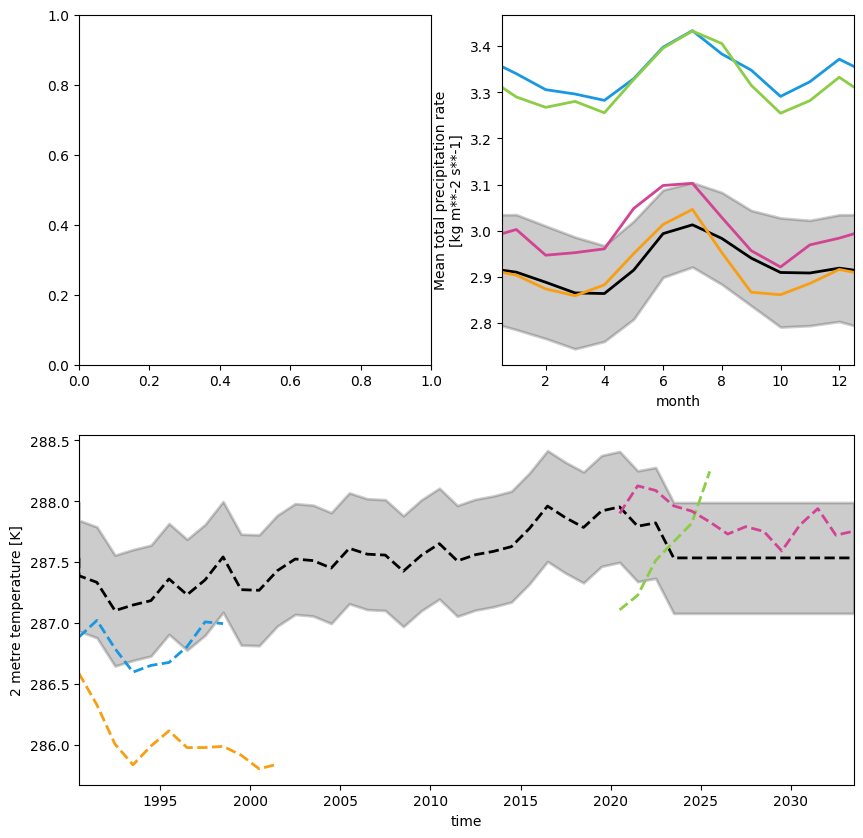

In [63]:
fig = plt.figure(figsize=(10, 10))

# Top line, gregory plot
ax1 = plt.subplot(2, 2, 1)

# Top line, seasonal cycle
ax2 = plt.subplot(2, 2, 2)
ax2.set_xlim(0.5,12.5)

era5_ss['mtpr'].plot(ax=ax2, label='ERA5', color='black', linestyle='-', lw=2)
ax2.fill_between(era5_ss.month, era5_ss['mtpr'].data - 2.*era5_ss_std_mon['mtpr'].data,
                era5_ss['mtpr'].data + 2.*era5_ss_std_mon['mtpr'].data, color='black', alpha=0.2,
                linestyle='-', lw=2)

for i in range(len(ss_plot)):
    ss_plot[i]['mtpr'].plot(ax=ax2, color=color_list[i], linestyle='-', lw=2)

# Bottom line, timeseries
ax3 = plt.subplot(2, 1, 2)
t0 = min(icon_histo_ts_ann.time.data[0], ifsnemo_histo_ts_ann.time.data[0])
t1 = max(icon_ssp_ts_ann.time.data[-1], ifsnemo_ssp_ts_ann.time.data[-1])
ax3.set_xlim(t0, t1)

era5_ts_ann['__xarray_dataarray_variable__'].plot(ax=ax3, label='ERA5', color='black', linestyle='--', lw=2)
ax3.fill_between(era5_ts_ann.time.data, era5_ts_ann['__xarray_dataarray_variable__'].data - 2.*era5_ts_std_ann['2t'].data,
                era5_ts_ann['__xarray_dataarray_variable__'].data + 2.*era5_ts_std_ann['2t'].data, color='black', alpha=0.2,
                linestyle='-', lw=2)

for i in range(len(ts_plot)):
    ts_plot[i]['2t'].plot(ax=ax3, color=color_list[i], linestyle='--', lw=2)
